# Importación de librerías.

In [1]:
import numpy as np
import pandas as pd
from sklearn import  linear_model
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#### Cargamos el dataset de las viviendas

In [2]:
viviendas = pd.read_csv('Datos_Pruebas.csv',header=0 ,sep=';')

Vamos a ver las columnas con la que cuenta el dataset. 

In [3]:
print(viviendas.keys())

Index(['Ubicación', 'Precio', 'Habitaciones', 'Baños', 'Planta',
       'Metros Cuadrados', 'Ascensor', 'Balcon', 'Terraza', 'Calefaccion',
       'Aire Acondicionado', 'Piscina', 'Extras', 'Parking'],
      dtype='object')


#### Visualizamos los datos

In [4]:
viviendas.head(50)

,Ubicación,Precio,Habitaciones,Baños,Planta,Metros Cuadrados,Ascensor,Balcon,Terraza,Calefaccion,Aire Acondicionado,Piscina,Extras,Parking
0,"Piso en Calle Mayor, 55",145000,4,2,5,145,Ascensor,Balcón,Terraza,Calefacción,Aire acondicionado,NaN,5,Parking
1,Piso en Centro,399000,3,2,2,125,Ascensor,Balcon,NaN,Calefaccion,Aire acondicionado,NaN,6,Parking
2,Piso en Centro,395000,4,2,2,172,Ascensor,NaN,Terraza,Calefaccion,Aire acondicionado,Piscina,10,Parking
3,Piso en Centro,189500,3,2,1,104,Ascensor,Balcon,NaN,Calefaccion,Aire acondicionado,NaN,1,Parking
4,Piso en Centro,370000,5,2,3,103,Ascensor,NaN,Terraza,Calefaccion,Aire acondicionado,NaN,3,Parking
5,Piso en Centro,178000,2,2,4,130,Ascensor,Balcon,NaN,Calefaccion,Aire acondicionado,Piscina,5,Parking
6,Piso en Centro,385000,4,2,1,188,Ascensor,Balcon,NaN,Calefaccion,Aire acondicionado,Piscina,3,Parking
7,Piso en Norte,335000,3,2,7,180,Ascensor,Balcon,NaN,Calefaccion,Aire acondicionado,Piscina,5,Parking
8,Piso en Centro,250000,4,1,2,106,Ascensor,Balcon,NaN,Calefaccion,Aire acondicionado,NaN,5,Parking
9,Piso en Sur,119000,5,2,1,146,Ascensor,NaN,Terraza,Calefaccion,Aire acondicionado,NaN,6,Parking


Se procede a visualizar el númeor de columnas que contiene el dataset.

In [5]:
print(viviendas.shape)

(22, 14)


In [6]:
print(viviendas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Ubicación           22 non-null     object
 1   Precio              22 non-null     int64 
 2   Habitaciones        22 non-null     int64 
 3   Baños               22 non-null     int64 
 4   Planta              22 non-null     int64 
 5   Metros Cuadrados    22 non-null     int64 
 6   Ascensor            22 non-null     object
 7   Balcon              19 non-null     object
 8   Terraza             6 non-null      object
 9   Calefaccion         22 non-null     object
 10  Aire Acondicionado  22 non-null     object
 11  Piscina             7 non-null      object
 12  Extras              22 non-null     int64 
 13  Parking             22 non-null     object
dtypes: int64(6), object(8)
memory usage: 2.5+ KB
None


#### Validación de los campos vacíos que nos encontramos en nuestro dataset.

In [7]:
columnas = viviendas.columns.tolist()

for column in columnas:
    print("Valores nulos en <{0}>: {1}".format(column, viviendas[column].isnull().sum()))

Valores nulos en <Ubicación>: 0
Valores nulos en <Precio>: 0
Valores nulos en <Habitaciones>: 0
Valores nulos en <Baños>: 0
Valores nulos en <Planta>: 0
Valores nulos en <Metros Cuadrados>: 0
Valores nulos en <Ascensor>: 0
Valores nulos en <Balcon>: 3
Valores nulos en <Terraza>: 16
Valores nulos en <Calefaccion>: 0
Valores nulos en <Aire Acondicionado>: 0
Valores nulos en <Piscina>: 15
Valores nulos en <Extras>: 0
Valores nulos en <Parking>: 0


# Pasamos las columnas object a float/int.

In [8]:

try:
    viviendas['Habitaciones'] = viviendas['Habitaciones'].astype(int, errors = 'raise')
except:
    print("Ha fallado la conversión a int -> Habitaciones")
try:
    viviendas['Metros Cuadrados'] = viviendas['Metros Cuadrados'].astype(int, errors = 'raise')
except:
    print("Ha fallado la conversión a int -> Metros Cuadrados")
try:    
    viviendas['Baños'] = viviendas['Baños'].astype(int, errors = 'raise')
except:
    print("Ha fallado la conversión a float -> Baños")  
try:    
    viviendas['Planta'] = viviendas['Planta'].astype(int, errors = 'raise')
except:
    print("Ha fallado la conversión a float -> Planta")        
try:
    viviendas['Balcon'] = (viviendas['Balcon'] == 'Balcón').astype(int)
except: 
    print("Ha falldo la conversión a int -> Balcon")
try:
    viviendas['Ascensor'] = (viviendas['Ascensor'] == 'Ascensor').astype(int)
except: 
    print("Ha falldo la conversión a int -> Ascensor")
try:
    viviendas['Terraza'] = (viviendas['Terraza'] == 'Terraza').astype(int)
except: 
    print("Ha falldo la conversión a int -> Terraza")   
try:
    viviendas['Calefaccion'] = (viviendas['Calefaccion'] == 'Calefacción').astype(int)
except: 
    print("Ha falldo la conversión a int -> Calefaccion")    
try:
    viviendas['Aire Acondicionado'] = (viviendas['Aire Acondicionado'] == 'Aire acondicionado').astype(int)
except: 
    print("Ha falldo la conversión a int -> Aire Acondicionado")    
try:
    viviendas['Piscina'] = (viviendas['Piscina'] == 'Piscina').astype(int)
except: 
    print("Ha falldo la conversión a int -> Piscina")    
try:
    viviendas['Parking'] = (viviendas['Parking'] == 'Parking').astype(int)
except: 
    print("Ha falldo la conversión a int -> Parking")
"""

from sklearn import preprocessing

transfor_datos = preprocessing.LabelEncoder()
viviendas = viviendas.apply(transfor_datos.fit_transform)

print(viviendas.keys())
"""

'\n\nfrom sklearn import preprocessing\n\ntransfor_datos = preprocessing.LabelEncoder()\nviviendas = viviendas.apply(transfor_datos.fit_transform)\n\nprint(viviendas.keys())\n'

#### Debemos pasar la variable a predecir a un un formato científico, de lo contrario no podremos trabajar con ella.

In [9]:
viviendas.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Precio,22.0,277459.090909,137477.255813,115000.0,152025.00,249000.0,381250.00,590000.0
Habitaciones,22.0,3.590909,1.007547,2.0,3.00,3.0,4.00,6.0
Baños,22.0,1.818182,0.394771,1.0,2.00,2.0,2.00,2.0
Planta,22.0,2.545455,1.870250,1.0,1.00,2.0,3.75,7.0
Metros Cuadrados,22.0,143.772727,53.254047,85.0,112.75,127.5,161.00,341.0
Ascensor,22.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Balcon,22.0,0.045455,0.213201,0.0,0.00,0.0,0.00,1.0
Terraza,22.0,0.272727,0.455842,0.0,0.00,0.0,0.75,1.0
Calefaccion,22.0,0.045455,0.213201,0.0,0.00,0.0,0.00,1.0
Aire Acondicionado,22.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


Vamos a visualizar unos grafícos de todas las varibles que contiene el dataset para entender un poco más los datos que contiene.

In [10]:
#sns.pairplot(viviendas)

Text(0, 0.5, 'Nº de Habitaciones')

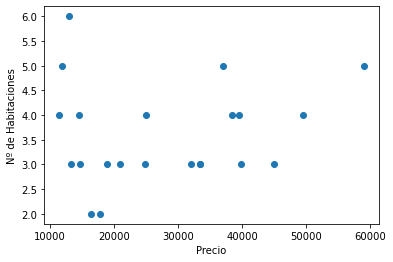

In [11]:
plt.scatter(viviendas['Precio']*0.1, viviendas['Habitaciones'])
plt.xlabel('Precio')
plt.ylabel('Nº de Habitaciones')

In [12]:
#from scipy import stats
#z = np.abs (stats.zscore (viviendas['Habitaciones']))

In [13]:
corr_matrix = viviendas.corr(method='pearson')
corr_matrix

,Precio,Habitaciones,Baños,Planta,Metros Cuadrados,Ascensor,Balcon,Terraza,Calefaccion,Aire Acondicionado,Piscina,Extras,Parking
Precio,1.000000,0.131680,0.324500,-0.278530,0.093365,NaN,-0.215200,0.102008,-0.215200,NaN,0.643584,0.094619,NaN
Habitaciones,0.131680,1.000000,0.163256,-0.381356,-0.029327,NaN,0.090687,0.254491,0.090687,NaN,-0.013519,0.057079,NaN
Baños,0.324500,0.163256,1.000000,-0.310756,0.349028,NaN,0.102869,0.288675,0.102869,NaN,0.322031,0.189383,NaN
Planta,-0.278530,-0.381356,-0.310756,1.000000,-0.165079,NaN,0.293132,-0.126944,0.293132,NaN,0.009711,0.060475,NaN
Metros Cuadrados,0.093365,-0.029327,0.349028,-0.165079,1.000000,NaN,0.005147,-0.011056,0.005147,NaN,0.308717,0.129158,NaN
Ascensor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balcon,-0.215200,0.090687,0.102869,0.293132,0.005147,NaN,1.000000,0.356348,1.000000,NaN,-0.149071,0.035966,NaN
Terraza,0.102008,0.254491,0.288675,-0.126944,-0.011056,NaN,0.356348,1.000000,0.356348,NaN,0.019920,0.100929,NaN
Calefaccion,-0.215200,0.090687,0.102869,0.293132,0.005147,NaN,1.000000,0.356348,1.000000,NaN,-0.149071,0.035966,NaN
Aire Acondicionado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Vamos a ver una gráfica para verificar la cantidad media de habitaciones que contiene una vivienda. 

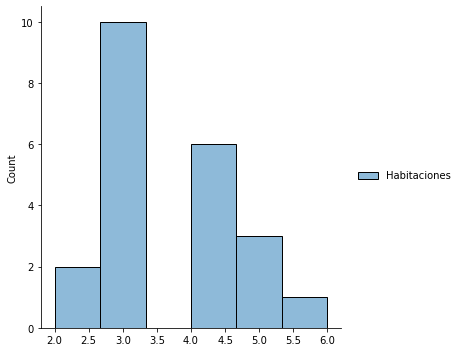

In [14]:
sns.displot(viviendas[['Habitaciones']])

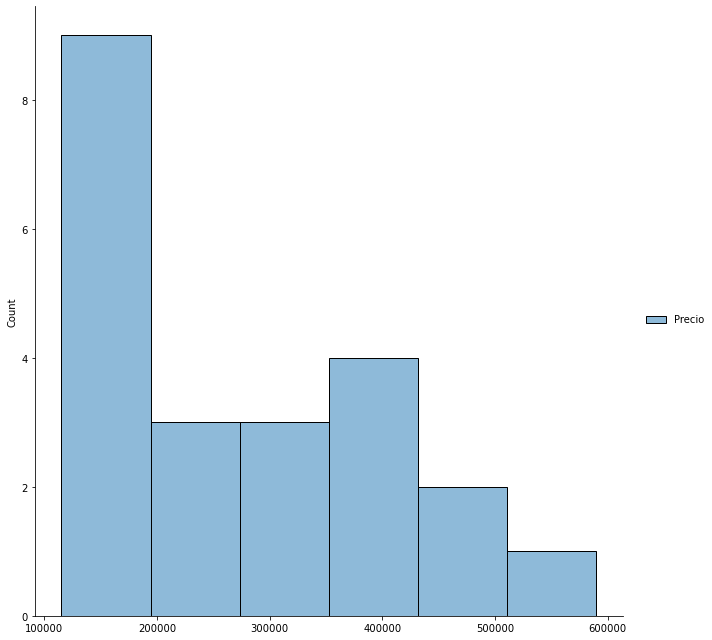

In [15]:
sns.displot(viviendas[['Precio']],height = 9)

#### Asimetría utilizando la función

In [16]:
skewValue = viviendas.skew(axis=1)
#kurtosis = viviendas.kurtosis(axis=1)
print(skewValue)
#print(kurtosis)

0     3.605545
1     3.605551
2     3.605550
3     3.605549
4     3.605551
5     3.605548
6     3.605550
7     3.605549
8     3.605550
9     3.605542
10    3.605547
11    3.605549
12    3.605545
13    3.605551
14    3.605550
15    3.605550
16    3.605546
17    3.605550
18    3.605551
19    3.605518
20    3.605550
21    3.605550
dtype: float64


/var/folders/1c/_l52p0dn6d72qj1gk77trqbw0000gn/T/ipykernel_17039/24243073.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewValue = viviendas.skew(axis=1)


#### Normalización de los datos.

In [17]:
"""
viviendas['Precio']= (viviendas['Precio'] - viviendas['Precio'].min()) / ( viviendas['Precio'].max() - viviendas['Precio'].min())
viviendas['Habitaciones']= (viviendas['Habitaciones'] - viviendas['Habitaciones'].min()) / ( viviendas['Habitaciones'].max() - viviendas['Habitaciones'].min())
viviendas['Baños']= (viviendas['Baños'] - viviendas['Baños'].min()) / ( viviendas['Baños'].max() - viviendas['Baños'].min())
viviendas['Planta']= (viviendas['Planta'] - viviendas['Planta'].min()) / ( viviendas['Planta'].max() - viviendas['Planta'].min())
viviendas['Metros Cuadrados']= (viviendas['Metros Cuadrados'] - viviendas['Metros Cuadrados'].min()) / ( viviendas['Metros Cuadrados'].max() - viviendas['Precio'].min())
viviendas['Extras']= (viviendas['Extras'] - viviendas['Extras'].min()) / ( viviendas['Extras'].max() - viviendas['Extras'].min())
viviendas['Ascensor']= (viviendas['Ascensor'] - viviendas['Ascensor'].min()) / ( viviendas['Ascensor'].max() - viviendas['Ascensor'].min())
viviendas['Balcon']= (viviendas['Balcon'] - viviendas['Balcon'].min()) / ( viviendas['Balcon'].max() - viviendas['Balcon'].min())
viviendas['Terraza']= (viviendas['Terraza'] - viviendas['Terraza'].min()) / ( viviendas['Terraza'].max() - viviendas['Terraza'].min())
"""

"\nviviendas['Precio']= (viviendas['Precio'] - viviendas['Precio'].min()) / ( viviendas['Precio'].max() - viviendas['Precio'].min())\nviviendas['Habitaciones']= (viviendas['Habitaciones'] - viviendas['Habitaciones'].min()) / ( viviendas['Habitaciones'].max() - viviendas['Habitaciones'].min())\nviviendas['Baños']= (viviendas['Baños'] - viviendas['Baños'].min()) / ( viviendas['Baños'].max() - viviendas['Baños'].min())\nviviendas['Planta']= (viviendas['Planta'] - viviendas['Planta'].min()) / ( viviendas['Planta'].max() - viviendas['Planta'].min())\nviviendas['Metros Cuadrados']= (viviendas['Metros Cuadrados'] - viviendas['Metros Cuadrados'].min()) / ( viviendas['Metros Cuadrados'].max() - viviendas['Precio'].min())\nviviendas['Extras']= (viviendas['Extras'] - viviendas['Extras'].min()) / ( viviendas['Extras'].max() - viviendas['Extras'].min())\nviviendas['Ascensor']= (viviendas['Ascensor'] - viviendas['Ascensor'].min()) / ( viviendas['Ascensor'].max() - viviendas['Ascensor'].min())\nvivie

In [18]:
viviendas

,Ubicación,Precio,Habitaciones,Baños,Planta,Metros Cuadrados,Ascensor,Balcon,Terraza,Calefaccion,Aire Acondicionado,Piscina,Extras,Parking
0,"Piso en Calle Mayor, 55",145000,4,2,5,145,1,1,1,1,1,0,5,1
1,Piso en Centro,399000,3,2,2,125,1,0,0,0,1,0,6,1
2,Piso en Centro,395000,4,2,2,172,1,0,1,0,1,1,10,1
3,Piso en Centro,189500,3,2,1,104,1,0,0,0,1,0,1,1
4,Piso en Centro,370000,5,2,3,103,1,0,1,0,1,0,3,1
5,Piso en Centro,178000,2,2,4,130,1,0,0,0,1,1,5,1
6,Piso en Centro,385000,4,2,1,188,1,0,0,0,1,1,3,1
7,Piso en Norte,335000,3,2,7,180,1,0,0,0,1,1,5,1
8,Piso en Centro,250000,4,1,2,106,1,0,0,0,1,0,5,1
9,Piso en Sur,119000,5,2,1,146,1,0,1,0,1,0,6,1


# Vamos a calcular la Regresíon Lineal Multiple.
* **𝑌=𝑎+𝑏*x+...𝑏n𝑋n**

Vamos a preparar los datos de entrenamiento y test.

    - Variables de Entrada: X.
    - Variable de Salida: Y.

In [19]:
X = viviendas[['Habitaciones', 'Baños', 'Planta','Metros Cuadrados','Ascensor','Balcon','Terraza','Calefaccion',
              'Aire Acondicionado','Piscina','Extras','Parking']]
#['Habitaciones', 'Baños', 'Planta','Metros Cuadrados','Ascensor','Balcon','Terraza','Calefaccion',
#              'Aire Acondicionado','Piscina','Extras','Parking']

y = viviendas['Precio']

 Graficamos los datos correspondiente (en formato dispersión).

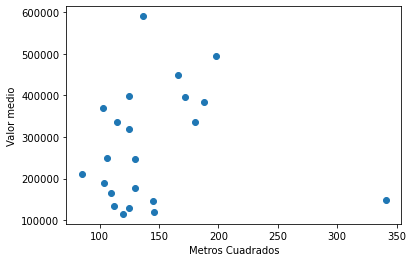

In [20]:
plt.scatter(viviendas['Metros Cuadrados'],viviendas['Precio'])
plt.xlabel('Metros Cuadrados')
plt.ylabel('Valor medio')
plt.show()

#### Tomamos un 20% del dataset para Test quedando el 80% para entrenamiento.

In [21]:
# Importamos sklearn para entrenar nuestro algoritmo.
from sklearn.model_selection import train_test_split

# Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Muestra de datos para X_train

In [22]:
print('Se visualiza los datos recogidos para los datos de entrenamiento.')
X_train

Se visualiza los datos recogidos para los datos de entrenamiento.


,Habitaciones,Baños,Planta,Metros Cuadrados,Ascensor,Balcon,Terraza,Calefaccion,Aire Acondicionado,Piscina,Extras,Parking
18,5,2,1,137,1,0,0,0,1,1,5,1
16,6,2,1,125,1,0,0,0,1,0,5,1
3,3,2,1,104,1,0,0,0,1,0,1,1
8,4,1,2,106,1,0,0,0,1,0,5,1
1,3,2,2,125,1,0,0,0,1,0,6,1
13,3,2,2,115,1,0,0,0,1,0,10,1
14,3,1,2,85,1,0,0,0,1,0,1,1
5,2,2,4,130,1,0,0,0,1,1,5,1
15,3,2,1,166,1,0,1,0,1,1,3,1
21,4,2,2,198,1,0,0,0,1,1,3,1


#### Muestra de datos para X_test

In [23]:
print('Se visualiza el total de datos recogidos para los datos de test')
X_test

Se visualiza el total de datos recogidos para los datos de test


,Habitaciones,Baños,Planta,Metros Cuadrados,Ascensor,Balcon,Terraza,Calefaccion,Aire Acondicionado,Piscina,Extras,Parking
4,5,2,3,103,1,0,1,0,1,0,3,1
19,3,2,1,341,1,0,0,0,1,0,5,1
0,4,2,5,145,1,1,1,1,1,0,5,1
2,4,2,2,172,1,0,1,0,1,1,10,1
10,3,2,4,112,1,0,0,0,1,0,3,1
9,5,2,1,146,1,0,1,0,1,0,6,1
7,3,2,7,180,1,0,0,0,1,1,5,1


In [24]:
# Definimos el algoritmo a usar "Regresión Lineal" y lo entrenamos
regresion_multiple = linear_model.LinearRegression().fit(X_train, y_train)

##### Realizamos la predicción

In [25]:
Y_pred = regresion_multiple.predict(X_test)


### MODELO REGRESIÓN LINEAL MULTIPLE

In [26]:
print('Valor de las pendientes o coeficientes "a":')
print(regresion_multiple.coef_, "\n")

Valor de las pendientes o coeficientes "a":
[-2.32715555e+04 -7.92876567e+04 -5.10102957e+04  1.26599149e+03
  1.36424205e-11  0.00000000e+00  2.79925616e+04  0.00000000e+00
  0.00000000e+00  1.41732090e+05  2.21644125e+04  0.00000000e+00] 



#### Procedemos a calcular la intercepción, el cual indica el grado de inclinación que contendrá nuestra línea.

In [27]:
print('Valor de la intersección o coeficiente "b":')
print(regresion_multiple.intercept_, "\n")

Valor de la intersección o coeficiente "b":
314846.67004291323 



#### Ecuación por completo

In [28]:
print('La ecuación del modelo es igual a:')
print('y =', regresion_multiple.coef_, 'x ', regresion_multiple.intercept_)

La ecuación del modelo es igual a:
y = [-2.32715555e+04 -7.92876567e+04 -5.10102957e+04  1.26599149e+03
  1.36424205e-11  0.00000000e+00  2.79925616e+04  0.00000000e+00
  0.00000000e+00  1.41732090e+05  2.21644125e+04  0.00000000e+00] x  314846.67004291323


##### Precisión del algoritmo con los datos de entrenamiento.

In [29]:
print('Precisión del modelo (Entrenamiento):')
print(regresion_multiple.score(X_train, y_train))

Precisión del modelo (Entrenamiento):
0.632232733427613


In [30]:
print('Precisión del modelo (Test):')
print(regresion_multiple.score(X_test, y_test))

Precisión del modelo (Test):
-2.711340741718447


#### Comparacíon de Y_test respecto a la Y_pred

In [31]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':Y_pred, 'Residuals':(y_test-Y_pred) }).head(10)

,Y_Test,Y_Pred,Residuals
4,370000,111765.614228,258234.385772
19,147700,577971.554636,-430271.554636
0,145000,130517.045897,14482.954103
2,395000,570283.855917,-175283.855917
10,132900,90699.791374,42200.208626
9,119000,334717.077389,-215717.077389
7,335000,209817.240286,125182.759714


###### Procedemos a calcular el coeficiente que nos indicará cuanto aumentara de precio por cada unidad.

In [32]:
coeff_df = pd.DataFrame(regresion_multiple.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Habitaciones,-2.327156e+04
Baños,-7.928766e+04
Planta,-5.101030e+04
Metros Cuadrados,1.265991e+03
Ascensor,1.364242e-11
Balcon,0.000000e+00
Terraza,2.799256e+04
Calefaccion,0.000000e+00
Aire Acondicionado,0.000000e+00
Piscina,1.417321e+05


### Graficamos los datos junto con el modelo. Debemos recordar que debemos de reducir el máximo el error. Esto se realizara juntando lo máximo posible el punto a la línea roja todos los datos fuera de la línea están en error

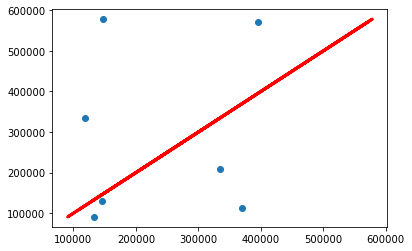

In [33]:
prediccion = regresion_multiple.predict(X_test)
plt.plot(prediccion, Y_pred,color='red',linewidth=3)
plt.scatter(y_test, prediccion)

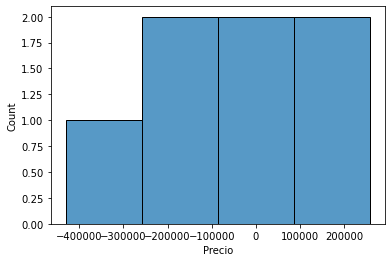

In [34]:
sns.histplot((y_test - prediccion), bins='auto');

# PROCEDEMOS A CALCULAR LA SIGUIENTES MÉTRICAS:

* El error absoluto medio (MAE) es la media del valor absoluto de los errores
* El error cuadrático medio (MSE) es la media de los errores cuadráticos.
* El error cuadrático medio (RMSE) es la raíz cuadrada de la media de los errores cuadráticos.

In [35]:
from sklearn import metrics

def evaluarErrores(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

testPrediccion = regresion_multiple.predict(X_test)
trainPrediccion = regresion_multiple.predict(X_train)


resultadoRegresionLinealTest = pd.DataFrame(data=[["Linear Regression Test", * evaluarErrores(y_test, testPrediccion)]], 
                          columns=['Modelo', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
resultadoRegresionLinealTrain = pd.DataFrame(data=[["Linear Regression Train", * evaluarErrores(y_train, trainPrediccion)]], 
                          columns=['Modelo', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

resultados = resultadoRegresionLinealTrain.append(resultadoRegresionLinealTest, ignore_index=True)

resultados
#resultadoRegresionLinealTest

,Modelo,MAE,MSE,RMSE,R2 Square
0,Linear Regression Train,67319.544171,6.985492e+09,83579.253398,0.632233
1,Linear Regression Test,180196.113737,4.953403e+10,222562.425671,-2.711341


# Vamos a predecir nuestra Regresión Lineal

In [36]:
print(regresion_multiple.predict([[3,1,4,100,1,1,1,0,1,0,3,1]]))
# ['Habitaciones', 'Baños', 'Planta','Metros Cuadrados','Ascensor','Balcon','Terraza','Calefaccion',
#              'Aire Acondicionado','Piscina','Extras','Parking']

[182788.11181092]
